In [1]:
#reading data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
import seaborn as sns

ds= pd.read_csv('breast_cancer_original.csv')
np.set_printoptions(suppress=True)

X= ds.iloc[:, 1:31]
y= ds.iloc[:, 0]



In [3]:
#categorical data
#malignant-> 1
#benign-> 0

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)


In [4]:

X = pd.DataFrame(X)
Y = y
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns.values)


<AxesSubplot:xlabel='Score', ylabel='Feature'>

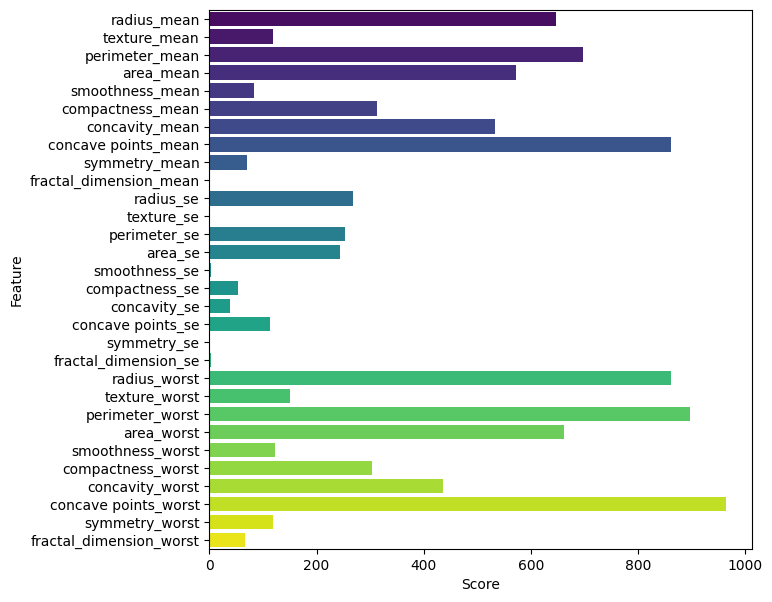

In [5]:

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns

#Visualize the feature scores
fig, ax=plt.subplots(figsize=(7,7))
plot=sns.barplot(data=featureScores, x='Score', y='Feature', palette='viridis',linewidth=0.5, saturation=2, orient='h')
#Plotter(plot, 'Score', 'Feature', legend=False, save=True, save_name='Feature Importance.png')#Plotter function for aesthetics
plot

In [6]:
#Selection method
selection=featureScores[featureScores['Score']>=400]
selection=list(selection['Feature'])
selection.append('diagnosis')

#Adding the Level string to be used to make new data frame
new_ds=ds[selection]
#New dataframe with selected features
new_ds.head()


,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst,diagnosis
0,17.99,122.80,1001.0,0.3001,0.14710,25.38,184.60,2019.0,0.7119,0.2654,M
1,20.57,132.90,1326.0,0.0869,0.07017,24.99,158.80,1956.0,0.2416,0.1860,M
2,19.69,130.00,1203.0,0.1974,0.12790,23.57,152.50,1709.0,0.4504,0.2430,M
3,11.42,77.58,386.1,0.2414,0.10520,14.91,98.87,567.7,0.6869,0.2575,M
4,20.29,135.10,1297.0,0.1980,0.10430,22.54,152.20,1575.0,0.4000,0.1625,M


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_ds.drop(['diagnosis'], axis=1), new_ds['diagnosis'], test_size=0.25, random_state=0)


In [8]:
#feature scaling

#from sklearn.preprocessing import StandardScaler
#sc_X= StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)

In [9]:
# Fitting Naive Bayes to the Training set  
#from sklearn.naive_bayes import GaussianNB  
#classifier = GaussianNB()  
#classifier.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(X_train, y_train)

#from sklearn.linear_model import  LogisticRegression
#clf = LogisticRegression()

#prediction the test set result
y_pred = classifier.predict(X_test)
y_pred

#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

ac = accuracy_score(y_test, y_pred)
ac

array([[86,  4],
       [ 2, 51]], dtype=int64)

In [10]:
print(classifier.feature_importances_)

[0.01839939 0.02824834 0.03443433 0.0494226  0.13054957 0.12423674
 0.18892426 0.18854973 0.03060636 0.20662867]


In [11]:
new_ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   radius_mean           569 non-null    float64
 1   perimeter_mean        569 non-null    float64
 2   area_mean             569 non-null    float64
 3   concavity_mean        569 non-null    float64
 4   concave points_mean   569 non-null    float64
 5   radius_worst          569 non-null    float64
 6   perimeter_worst       569 non-null    float64
 7   area_worst            569 non-null    float64
 8   concavity_worst       569 non-null    float64
 9   concave points_worst  569 non-null    float64
 10  diagnosis             569 non-null    object 
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


In [12]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

ac = accuracy_score(y_test, y_pred)
cm

array([[86,  4],
       [ 2, 51]], dtype=int64)

In [1]:
rm= input("rm")
pm= input("pm")
am= input("am")
cm= input("cm")
cpm= input("cpm")

rw= input("rw")
pw= input("pw")
aw= input("aw")
cw= input("cw")
cpw= input("cpw")

sample = [rm, pm, am, cm, cpm, rw, pw, aw, cw, cpw]
predy = classifier.predict([sample])
predy

In [25]:
#testing an input
b3 = [15,97.45,684.5,0.06505,0.0378,16.41,114.2,808.2,0.3402,0.1379]

In [26]:
predy = classifier.predict([b3])
predy

c:\Users\Vacha Patel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['B'], dtype=object)

In [27]:
pickle.dump(classifier, open('breast_cancer.pkl', 'wb'))
model = pickle.load(open('breast_cancer.pkl', 'rb'))
